<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Hierarchical_Vs_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd
import math
import random
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Mounted at /content/drive


In [2]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [3]:
dataset = pd.read_csv('Instagram visits clustering.csv')

In [4]:
dataset.describe()

,User ID,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,63.323462,42.848408
std,750.699674,26.579760,28.758349
min,0.000000,5.000000,0.940709
25%,649.750000,38.000000,19.452098
50%,1299.500000,72.000000,28.013082
75%,1949.250000,86.000000,72.116945
max,2599.000000,118.000000,107.349821


In [5]:
x = dataset.iloc[:,-2:].values


In [6]:
import scipy.cluster.hierarchy as sch

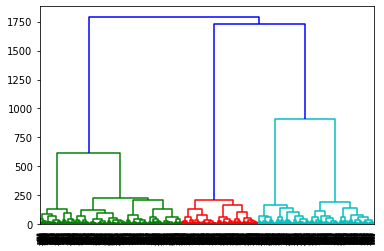

In [7]:
dendogram = sch.dendrogram(sch.linkage(x,method='ward'))

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [10]:
y_hc = hc.fit_predict(x)

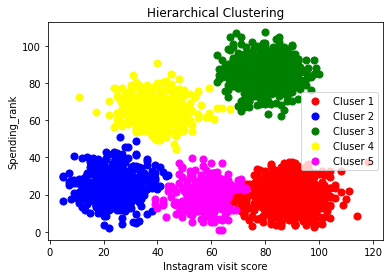

In [11]:
#Visualiz the Cluster
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=50,c='magenta',label='Cluser 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank')
plt.legend()

In [12]:
from sklearn.cluster import KMeans

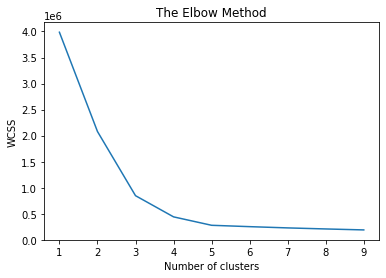

In [13]:
wcss=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)  

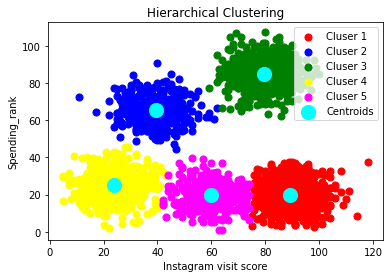

In [15]:
#Visualiz the Cluster
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=50,c='magenta',label='Cluser 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')

plt.title('Hierarchical Clustering')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank')
plt.legend()